In [1]:
import config
import pymph
import pygds
import numpy as np
import matplotlib.pyplot as plt

# single dot

In [2]:
config.numOfGDSlayers      = 6
config.gds_addr            = "double_dot.gds"
config.substrate_layers    = ['InAlAs','InGaAs','InAs','InGaAs','InAlAs']       
config.layer_thickness     = np.array([1500, 10.5, 4, 10.5, 120])   
config.substrate_size      = 40e3
config.dot_depth           = -134.5    
config.etch_depth          = -134.5     
config.qpc_depth           = 35
config.plunger_depth       = -(4+10.5+120-35)
config.numOfdots           = 1
config.dots_sep            = 2000
config.metal_size          = 800
config.trench_width        = 120
config.trench_chamfer      = config.trench_width/(2*abs(config.etch_depth)+config.trench_width) 
config.mph_addr            = "double_dot.mph"

config.etch_params = [
    {"etch_name": "mesa_etch", "gdslayerID": 0}
]

config.deposit_params = [
    {"thickness": 4,   "deposit_name": 'dot'        , "gdslayerID": 5},
    {"thickness": 100, "deposit_name": 'metal'      , "gdslayerID": 2},
    {"thickness": 35,  "deposit_name": 'Al2O3'      , "gdslayerID": 4},
    {"thickness": 35,  "deposit_name": 'metal_Al2O3', "gdslayerID": 2}
]

config.gate_params = [
    {"gate_depth": config.qpc_depth,     "gate_name": 'QPC',     "gdslayerID": 1},
    {"gate_depth": config.plunger_depth, "gate_name": 'Plunger', "gdslayerID": 3}
]

In [6]:
N = 21
dotarr = np.linspace(1000, 3000, N)
ci = np.zeros((N, 1))
for i,dot in enumerate(dotarr):
    try:
        config.dots_sep = dot
        pygds.gdsBuilder().build()
        pymph.build()
        pymph.study()
        ci[i] = config.cmatrix * 1e18
    except:
        print('error')

erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               


## capacitance

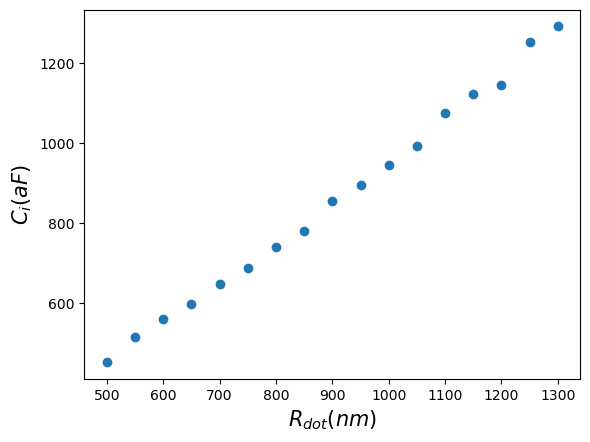

In [42]:
dotarr = np.linspace(1000, 3000, N)
ci = np.array([c for c in ci if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci) if b != 0])
dotarr = dotarr/2
plt.plot(dotarr,ci,'o')
plt.ylabel(r'$C_i (aF)$', fontsize = 15)
plt.xlabel(r'$R_{dot}(nm)$', fontsize = 15)

np.savez('single_dot.npz', dotarr, ci)

## charging energy

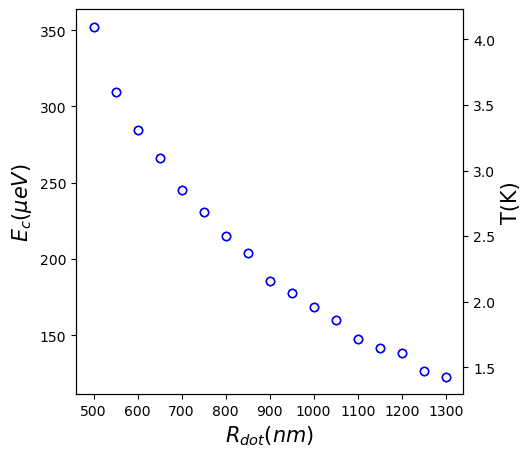

In [46]:
E_c = ((1.6e-19)**2 / (ci*1e-18))*6.2e18 * 1e6
dotarr = np.linspace(1000, 3000, N)
ci = np.array([c for c in ci if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci) if b != 0])
dotarr = dotarr/2

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,E_c,'o',color = 'blue', markerfacecolor='none')
ax1.set_ylabel(r'$E_c (\mu eV)$', fontsize = 15)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 15)
ax2 = ax1.twinx()
ax2.plot(dotarr, E_c / 86, 'o',color = 'blue', markerfacecolor='none')
ax2.set_ylabel('T(K)', fontsize = 15)
plt.savefig('RRR', dpi=500, bbox_inches='tight')

## 2d sweep

In [50]:
import time
def PrintLoopProgress(i, j, total_i, total_j, start_time):
    current_iteration = i * total_j + j + 1
    total_iterations  = total_i * total_j
    progress          = (current_iteration / total_iterations) * 100
    elapsed_time      = time.time() - start_time
    avg_time_per_iteration = elapsed_time / current_iteration
    remaining_time         = (total_iterations - current_iteration) * avg_time_per_iteration
    print(f"{int(progress)}% complete, Estimated time left: {int(remaining_time)}s", end='\r')


Nd = 11
Nm = 3
dotarr   = np.linspace(1000, 3000, Nd)
metalarr = np.linspace(200, 900, Nm)
ci = np.zeros((Nm, Nd))
start_time = time.time()

for i,dot in enumerate(dotarr):
    for j,metal in enumerate(metalarr):
        try:
            config.dots_sep   = dot
            config.metal_size = metal
            pygds.gdsBuilder().build()
            pymph.build()
            pymph.study()
            ci[i,j] = config.cmatrix * 1e18
            PrintLoopProgress(i, j, Nd, Nm, start_time)
        except:
            print('error')

erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
erroring the mesh                               
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model
errorng up the model


/Applications/COMSOL62/multiphysics/bin/macarm64/comsol: line 237: 66848 Abort trap: 6           ${FLROOT}/bin/comsol "$@"


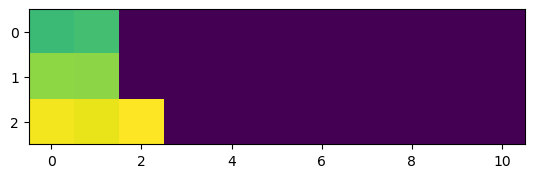

In [49]:
plt.imshow(ci)

# double dot

In [2]:
config.numOfGDSlayers      = 6
config.gds_addr            = "double_dot.gds"
config.substrate_layers    = ['InAlAs','InGaAs','InAs','InGaAs','InAlAs']       
config.layer_thickness     = np.array([1500, 10.5, 4, 10.5, 120])   
config.substrate_size      = 40e3
config.dot_depth           = -134.5    
config.etch_depth          = -134.5     
config.qpc_depth           = 35
config.plunger_depth       = -(4+10.5+120-35)
config.numOfdots           = 2
config.dots_sep            = 2000
config.metal_size          = 800
config.trench_width        = 120
config.trench_chamfer      = config.trench_width/(2*abs(config.etch_depth)+config.trench_width) 
config.mph_addr            = "double_dot.mph"

config.etch_params = [
    {"etch_name": "mesa_etch", "gdslayerID": 0}
]

config.deposit_params = [
    {"thickness": 4,   "deposit_name": 'dot'        , "gdslayerID": 5},
    {"thickness": 100, "deposit_name": 'metal'      , "gdslayerID": 2},
    {"thickness": 35,  "deposit_name": 'Al2O3'      , "gdslayerID": 4},
    {"thickness": 35,  "deposit_name": 'metal_Al2O3', "gdslayerID": 2}
]

config.gate_params = [
    {"gate_depth": config.qpc_depth,     "gate_name": 'QPC',     "gdslayerID": 1},
    {"gate_depth": config.plunger_depth, "gate_name": 'Plunger', "gdslayerID": 3}
]

In [8]:
N = 21
dotarr = np.linspace(1000, 3000, N)
ci = np.zeros((N, 2,2))
for i,dot in enumerate(dotarr):
    try:
        config.dots_sep = dot
        pygds.gdsBuilder().build()
        pymph.build()
        pymph.study()
        ci[i,:,:] = config.cmatrix * 1e18
    except:
        print('error')

erroring the mesh                               
erroring the mesh                               
erroring the mesh                               


In [43]:
np.savez('double_dot.npz', dotarr=dotarr, ci=ci)

In [44]:
data = np.load('double_dot.npz')
dotarr = data['dotarr']
ci     = data['ci']

cii = np.array([c for c in ci[:,0,0] if c != 0])
cij = np.array([c for c in ci[:,0,1] if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci[:,0,0]) if b != 0])
dotarr = dotarr/2

Text(0.5, 0, '$R_{dot}(nm)$')

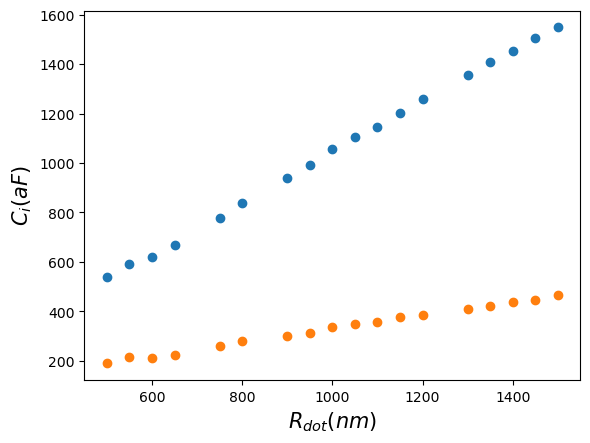

In [45]:
plt.plot(dotarr,cii,'o')
plt.plot(dotarr,abs(cij),'o')
plt.ylabel(r'$C_i (aF)$', fontsize = 15)
plt.xlabel(r'$R_{dot}(nm)$', fontsize = 15)

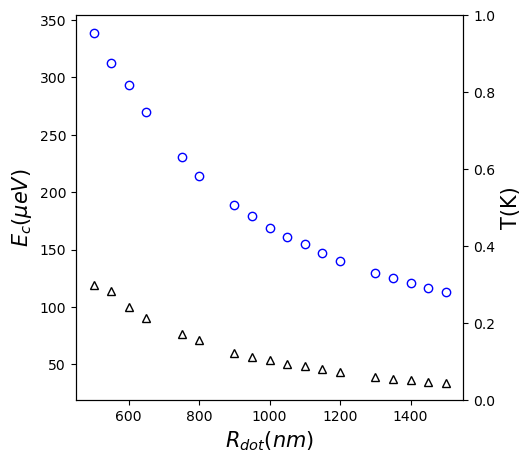

In [82]:
E_cii = (1.6e-19)**2 * (cii / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6
E_cij = (1.6e-19)**2 * (abs(cij) / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6


fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr, E_cii,'o',color = 'blue', markerfacecolor='none')
ax1.plot(dotarr, E_cij,'^',color = 'black', markerfacecolor='none')
ax1.set_ylabel(r'$E_c (\mu eV)$', fontsize = 15)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 15)
ax2 = ax1.twinx()
#ax2.plot(dotarr, E_cij / 86, 'o',color = 'blue', markerfacecolor='none')
ax2.set_ylabel('T(K)', fontsize = 15)

plt.savefig('RRR', dpi=500, bbox_inches='tight')

In [74]:
cii

array([ 537.81757713,  589.78192261,  617.55440086,  667.48703408,
        777.90135048,  839.18969137,  940.2016222 ,  990.03230191,
       1055.60351464, 1103.30566509, 1144.52334103, 1203.71788468,
       1256.82012637, 1356.38284725, 1407.78937348, 1451.36512297,
       1504.78083609, 1548.84524317])

# four dots

In [84]:
config.numOfGDSlayers      = 6
config.gds_addr            = "double_dot.gds"
config.substrate_layers    = ['InAlAs','InGaAs','InAs','InGaAs','InAlAs']       
config.layer_thickness     = np.array([1500, 10.5, 4, 10.5, 120])   
config.substrate_size      = 40e3
config.dot_depth           = -134.5    
config.etch_depth          = -134.5     
config.qpc_depth           = 35
config.plunger_depth       = -(4+10.5+120-35)
config.numOfdots           = 4
config.dots_sep            = 2000
config.metal_size          = 800
config.trench_width        = 120
config.trench_chamfer      = config.trench_width/(2*abs(config.etch_depth)+config.trench_width) 
config.mph_addr            = "quadruple_dot.mph"

config.etch_params = [
    {"etch_name": "mesa_etch", "gdslayerID": 0}
]

config.deposit_params = [
    {"thickness": 4,   "deposit_name": 'dot'        , "gdslayerID": 5},
    {"thickness": 100, "deposit_name": 'metal'      , "gdslayerID": 2},
    {"thickness": 35,  "deposit_name": 'Al2O3'      , "gdslayerID": 4},
    {"thickness": 35,  "deposit_name": 'metal_Al2O3', "gdslayerID": 2}
]

config.gate_params = [
    {"gate_depth": config.qpc_depth,     "gate_name": 'QPC',     "gdslayerID": 1},
    {"gate_depth": config.plunger_depth, "gate_name": 'Plunger', "gdslayerID": 3}
]

In [87]:
N = 21
dotarr = np.linspace(1000, 3000, N)
ci = np.zeros((N, 4,4))
for i,dot in enumerate(dotarr):
    try:
        config.dots_sep = dot
        pygds.gdsBuilder().build()
        pymph.build()
        pymph.study()
        ci[i,:,:] = config.cmatrix * 1e18
    except:
        print('error')

erroring the mesh                               
erroring the mesh                               
erroring the mesh                               


In [89]:
np.savez('four_dot.npz', dotarr=dotarr, ci=ci)

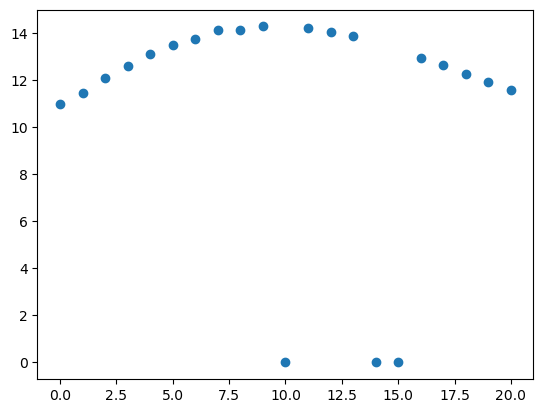

In [111]:
data = np.load('four_dot.npz')
dotarr = data['dotarr']
ci     = data['ci']

plt.plot(abs(ci[:,1,3]),'o')


In [115]:
ci

array([[[ 5.46840250e+02, -1.88757474e+02, -1.10398826e+01,
         -4.95596800e+00],
        [-1.88758114e+02,  6.50410804e+02, -1.75081368e+02,
         -1.10052013e+01],
        [-1.10301499e+01, -1.75085405e+02,  6.48485272e+02,
         -1.85771409e+02],
        [-4.96262686e+00, -1.09791803e+01, -1.85772649e+02,
          5.43741267e+02]],

       [[ 5.72212224e+02, -1.92823802e+02, -1.14892074e+01,
         -4.78730121e+00],
        [-1.92830663e+02,  6.97544357e+02, -1.96051005e+02,
         -1.14680406e+01],
        [-1.14982799e+01, -1.96057373e+02,  7.07467016e+02,
         -2.00443008e+02],
        [-4.79339126e+00, -1.14525738e+01, -2.00451994e+02,
          5.83293959e+02]],

       [[ 6.15334240e+02, -2.03524929e+02, -1.19863535e+01,
         -4.64682677e+00],
        [-2.03528279e+02,  7.39497813e+02, -1.96502349e+02,
         -1.20803738e+01],
        [-1.19784681e+01, -1.96522463e+02,  7.50512486e+02,
         -2.15215576e+02],
        [-4.65918990e+00, -1.20745262e+